In [7]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert2/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert2/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert2/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/final_audio/data_set_fusion/expert2/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [10]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [11]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [12]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [13]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [14]:
df_train=df_train.append(df_valid,ignore_index = True)

In [15]:
len(df_train)

1860

In [16]:
df_train

,labels
0,5
1,0
2,3
3,5
4,4
...,...
1855,4
1856,2
1857,5
1858,4


In [17]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [18]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.034799,0.007419,0.000058,0.858459,0.002880,0.096384,1.936922e-04,1.908428e-03,0.078206,9.176858e-01,1.406762e-04,1.865399e-03
1,0.001396,0.987387,0.003262,0.006616,0.001280,0.000060,6.731873e-06,9.937045e-01,0.006289,1.624251e-10,5.113370e-11,1.681340e-10
2,0.000005,0.000034,0.000028,0.001152,0.996537,0.002243,2.161565e-12,4.044053e-12,0.000015,1.074866e-07,9.999853e-01,1.410446e-09
3,0.001346,0.986554,0.002334,0.009568,0.000139,0.000058,2.586004e-10,9.924563e-01,0.007544,2.036131e-08,9.353461e-11,1.013496e-09
4,0.000085,0.000078,0.000104,0.014233,0.002473,0.983027,5.904779e-06,2.185693e-03,0.251693,1.491063e-02,3.083101e-02,7.003735e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.000170,0.002066,0.000020,0.972698,0.003607,0.021439,3.037690e-06,2.796054e-09,0.000311,1.403844e-01,8.592996e-01,1.962023e-06
203,0.002021,0.982734,0.007325,0.007506,0.000099,0.000315,7.445964e-09,2.950005e-01,0.705000,4.505449e-10,2.411701e-08,1.045695e-10
204,0.829458,0.032728,0.000222,0.126060,0.000330,0.011202,1.416181e-03,1.109177e-05,0.263639,3.032667e-03,5.601445e-01,1.717570e-01
205,0.000005,0.002402,0.997287,0.000186,0.000017,0.000103,1.083762e-08,2.700381e-08,0.899450,1.228025e-03,9.923257e-02,8.986195e-05


In [19]:
len(x_test),len(x_train)

(207, 1860)

In [20]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,0.000342,0.000037,0.000024,0.027184,0.001082,0.971331,1.477511e-05,1.385857e-05,8.573342e-03,5.370449e-03,0.011520,9.745075e-01
1,0.934390,0.031547,0.000232,0.029632,0.000626,0.003573,9.888964e-01,5.345706e-04,4.376766e-03,6.138285e-03,0.000043,1.134752e-05
2,0.000043,0.002962,0.000067,0.982080,0.000451,0.014398,5.876618e-05,8.869873e-07,3.299277e-03,9.957967e-01,0.000001,8.428627e-04
3,0.000082,0.000080,0.000066,0.019228,0.006593,0.973949,2.601166e-08,3.258120e-09,4.074245e-06,6.761953e-03,0.000006,9.932279e-01
4,0.000326,0.000169,0.000031,0.005374,0.981139,0.012960,1.885018e-15,1.793591e-16,7.978118e-06,8.331265e-12,0.999992,2.289524e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,0.000006,0.000039,0.000070,0.001118,0.995057,0.003711,4.777702e-14,1.250344e-16,3.322659e-06,2.739534e-11,0.999996,5.177264e-07
1856,0.001364,0.514139,0.464604,0.017488,0.000136,0.002269,4.546801e-04,9.774865e-06,8.153062e-01,9.660709e-04,0.183262,1.477006e-06
1857,0.000059,0.000045,0.000058,0.015229,0.002455,0.982153,9.533036e-08,7.544653e-14,6.652730e-07,9.903812e-06,0.003581,9.964080e-01
1858,0.000124,0.000557,0.000073,0.025379,0.955971,0.017896,6.918514e-11,3.914774e-12,2.342406e-04,1.050079e-07,0.999754,1.123510e-05


In [21]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [22]:
len(new_y_train)

1860

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [24]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([5, 0, 3, ..., 5, 4, 5]), (1860,))

# training machine learning

In [25]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='linear')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [26]:
predictions

array([3, 1, 4, 1, 5, 3, 5, 0, 2, 2, 2, 4, 0, 1, 0, 4, 1, 1, 4, 5, 0, 2,
       2, 1, 0, 2, 2, 3, 4, 1, 3, 0, 2, 1, 1, 3, 1, 4, 0, 3, 1, 4, 5, 1,
       2, 2, 1, 0, 4, 5, 4, 1, 5, 0, 1, 4, 5, 3, 3, 5, 0, 3, 4, 3, 4, 5,
       1, 4, 2, 0, 5, 2, 3, 3, 2, 1, 4, 4, 5, 5, 5, 2, 5, 4, 3, 2, 4, 4,
       4, 4, 2, 0, 2, 1, 2, 1, 4, 1, 2, 5, 4, 5, 5, 2, 3, 2, 1, 3, 3, 5,
       5, 1, 5, 4, 4, 2, 4, 4, 2, 2, 1, 3, 1, 5, 3, 0, 3, 1, 5, 4, 4, 4,
       1, 5, 2, 1, 4, 4, 3, 3, 4, 1, 1, 3, 1, 1, 4, 2, 3, 3, 2, 5, 3, 3,
       3, 3, 0, 5, 3, 4, 3, 5, 3, 2, 3, 5, 1, 3, 3, 5, 5, 2, 0, 2, 1, 5,
       4, 5, 1, 1, 5, 3, 3, 4, 1, 2, 3, 0, 5, 2, 0, 1, 3, 0, 5, 0, 4, 1,
       5, 5, 2, 4, 3, 1, 4, 2, 1])

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      0.95      0.95        40
           2       1.00      0.94      0.97        36
           3       0.90      0.81      0.85        43
           4       0.90      1.00      0.95        35
           5       0.86      0.97      0.91        32

    accuracy                           0.93       207
   macro avg       0.93      0.93      0.93       207
weighted avg       0.93      0.93      0.93       207

----accuracy score 92.7536231884058 ----


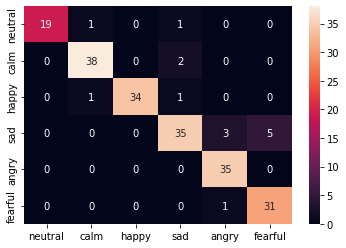

In [27]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [28]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/linear/expert2'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
